# This script demonstrates the least square approximate solution
# Name : Sunjun Hwang
# Student ID : 20151766
# github link : https://github.com/tjswns494/Mathematical-Foundations-for-Computer-Vision-and-Machine-Learning-assignment.git


# import packages for plotting images and manipulating data and construct table:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read image

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


# define normalize function

In [3]:

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# make a matrix each column of which represents an images in a vector form 

In [4]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

# split image in to one column vector

In [5]:
count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1


# define b= -1 if b is not num, b=1 if b is num

In [6]:
def b_label(b,num):
    label=np.zeros(list_label_train.size)
    for i in range(label.size):
        if b[i]!=num:
            label[i]=-1
        else:
            label[i]=1
    return label

# define least square function

In [7]:

def lsp(list_image_train,list_label_train,p,label):
    result=np.zeros(list_label_train.size)
    A=list_image_train.T
    s=np.random.normal(0, 1, (p,784))
    A1=s.dot(A.T)
    
    lsp_result=np.linalg.pinv(A1.dot(A1.T)).dot(A1).dot(label)
    test=s.dot(list_image_test)
    for i in range(p):
        result=lsp_result.dot(test)
    return result


# define the ^{f} classifier using argmax

In [8]:
def fhat(label):
    fhat_result=np.zeros(list_label_test.size)
    for i in range (list_label_test.size):
        fhat_result[i]=pd.Series(label[i]).idxmax()
    return fhat_result

# define F1

In [9]:
def f1(num):
    TP,FP,FN,TN=0,0,0,0
    for i in range(10):
        TP+=num[i][i]
        for j in range(10):
            FP+=num[j][i]
            FN+=num[i][j]
            
    TN=10000-TP-FP-FN

    precision=TP/(TP+FP)
    recall=TP/(FN+TP)
    f1=2*precision*recall/(precision+recall)
    return f1



# Try with varying the number of parameters p with the standard deviation 1 of the random feature vector r

In [10]:
f1_result=np.zeros(10)
p=[32,64,128,256,512]
b=list_label_train.T
label=np.zeros((10,list_label_train.size))
lsp_result=np.zeros((10,list_label_test.size))
fhat_result=np.zeros((len(p),list_label_test.size))
f1_result=np.zeros(len(p))

for i in range(10):
    label[i]=b_label(b,i)
for i in range(len(p)):
    for j in range(10):
        lsp_result[j]=lsp(list_image_train,list_label_train,p[i],label[j])
    fhat_result[i]=fhat(lsp_result.T)

# Present the confusion matrix M(i; j) that indicates the number of classification for the digit i as the digit j

In [11]:
num=np.zeros((10,10))
for i in range(len(p)):
    print("p: "+str(p[i]))
    for j in range(list_label_test.size):
        num[list_label_test[j]][int(fhat_result[i][j])]+=1
    f1_result[i]=f1(num)
    print("f1 score: "+str(f1_result[i]))
    for k in range(10):
        num[k]/=np.sum(num[k])
    df=pd.DataFrame({'0':[num[0][0],num[0][1],num[0][2],num[0][3],num[0][4],num[0][5],num[0][6],num[0][7],num[0][8],num[0][9]],
                 '1':[num[1][0],num[1][1],num[1][2],num[1][3],num[1][4],num[1][5],num[1][6],num[1][7],num[1][8],num[1][9]],
                 '2':[num[2][0],num[2][1],num[2][2],num[2][3],num[2][4],num[2][5],num[2][6],num[2][7],num[2][8],num[2][9]],
                 '3':[num[3][0],num[3][1],num[3][2],num[3][3],num[3][4],num[3][5],num[3][6],num[3][7],num[3][8],num[3][9]],
                 '4':[num[4][0],num[4][1],num[4][2],num[4][3],num[4][4],num[4][5],num[4][6],num[4][7],num[4][8],num[4][9]],
                 '5':[num[5][0],num[5][1],num[5][2],num[5][3],num[5][4],num[5][5],num[5][6],num[5][7],num[5][8],num[5][9]],
                 '6':[num[6][0],num[6][1],num[6][2],num[6][3],num[6][4],num[6][5],num[6][6],num[6][7],num[6][8],num[6][9]],
                 '7':[num[7][0],num[7][1],num[7][2],num[7][3],num[7][4],num[7][5],num[7][6],num[7][7],num[7][8],num[7][9]],
                 '8':[num[8][0],num[8][1],num[8][2],num[8][3],num[8][4],num[8][5],num[8][6],num[8][7],num[8][8],num[8][9]],
                 '9':[num[9][0],num[9][1],num[9][2],num[9][3],num[9][4],num[9][5],num[9][6],num[9][7],num[9][8],num[9][9]],
                },index=['0','1','2','3','4','5','6','7','8','9']) 
    
df

p: 32
f1 score: 0.40824900881708975
p: 64
f1 score: 0.4433890730729026
p: 128
f1 score: 0.4554431957720994
p: 256
f1 score: 0.4595711627001075
p: 512
f1 score: 0.46065274692090846


,0,1,2,3,4,5,6,7,8,9
0,0.959181,0.000000,1.744280e-02,0.003962,0.001017,0.024664,2.087574e-02,4.863812e-03,0.017455,1.784141e-02
1,0.000001,0.974448,5.523351e-02,0.013866,0.022403,0.019057,1.043841e-02,3.502230e-02,0.055449,1.189395e-02
2,0.002040,0.001762,7.877982e-01,0.023760,0.006110,0.004487,9.396752e-03,1.459144e-02,0.010267,3.963342e-03
3,0.003060,0.001761,2.519381e-02,0.881180,0.003052,0.095299,1.136191e-09,7.783043e-03,0.032857,1.288601e-02
4,0.001021,0.000882,1.646819e-02,0.001981,0.882894,0.019061,2.191957e-02,2.139794e-02,0.027722,7.333602e-02
5,0.008165,0.000881,9.371334e-07,0.012875,0.003055,0.702871,1.983298e-02,2.602955e-15,0.039010,9.851548e-07
6,0.015308,0.004405,3.584708e-02,0.008911,0.010185,0.023554,9.081431e-01,9.746543e-04,0.015406,9.920654e-04
7,0.002040,0.001762,1.841461e-02,0.022777,0.002037,0.014580,3.551819e-12,8.560387e-01,0.014375,7.432906e-02
8,0.007144,0.014098,3.778789e-02,0.019797,0.014254,0.074002,9.393484e-03,4.862868e-03,0.765903,9.908839e-03
9,0.002040,0.000000,5.813014e-03,0.010889,0.054993,0.022425,1.133829e-09,5.446526e-02,0.021556,7.948483e-01


# Present the best F1 score among the results with different number of parameters p

best p is 512


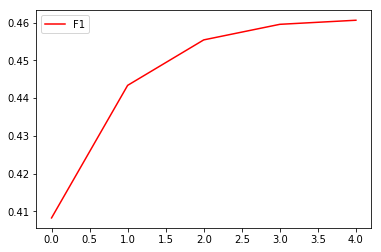

In [12]:
m=pd.Series(f1_result).idxmax()
print("best p is " +str(p[m]))
plt.figure()
plt.plot(f1_result,color='r',label='F1')
plt.legend()
plt.show()